In [1]:
#import all the required 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# load data into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\lenovo\OneDrive\Documents\Research\Heart\Dataset\cardio_train.csv') 
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no null values in this dataset, and all data values are either ints or floats.

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


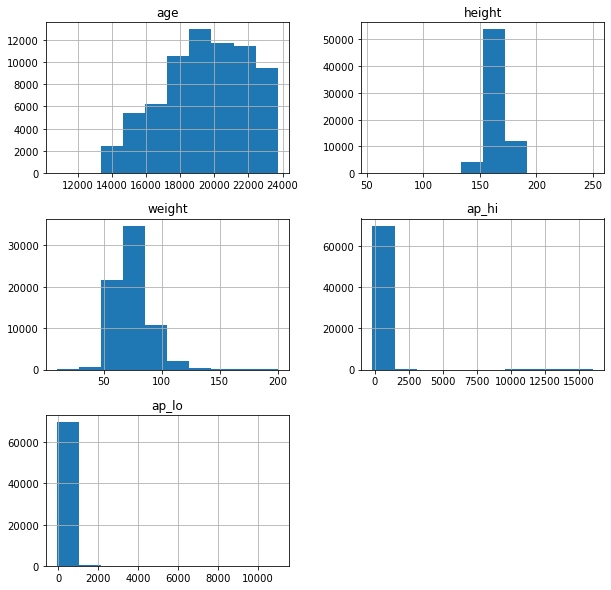

In [5]:
df[['age','height','weight','ap_hi','ap_lo']].hist(figsize=(10,10))
plt.show()

From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure (ap_hi and ap_lo), are unrealistic. This suggests the presence of outliers in the data.

In [6]:
# check distribution of target variable
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

35,021 out of 70,000 cases in this dataset are labelled as having no cardiovascular disease, and 34,979 cases are labelled as having cardiovascular disease. This suggests that the dataset is roughly balanced.

<AxesSubplot:>

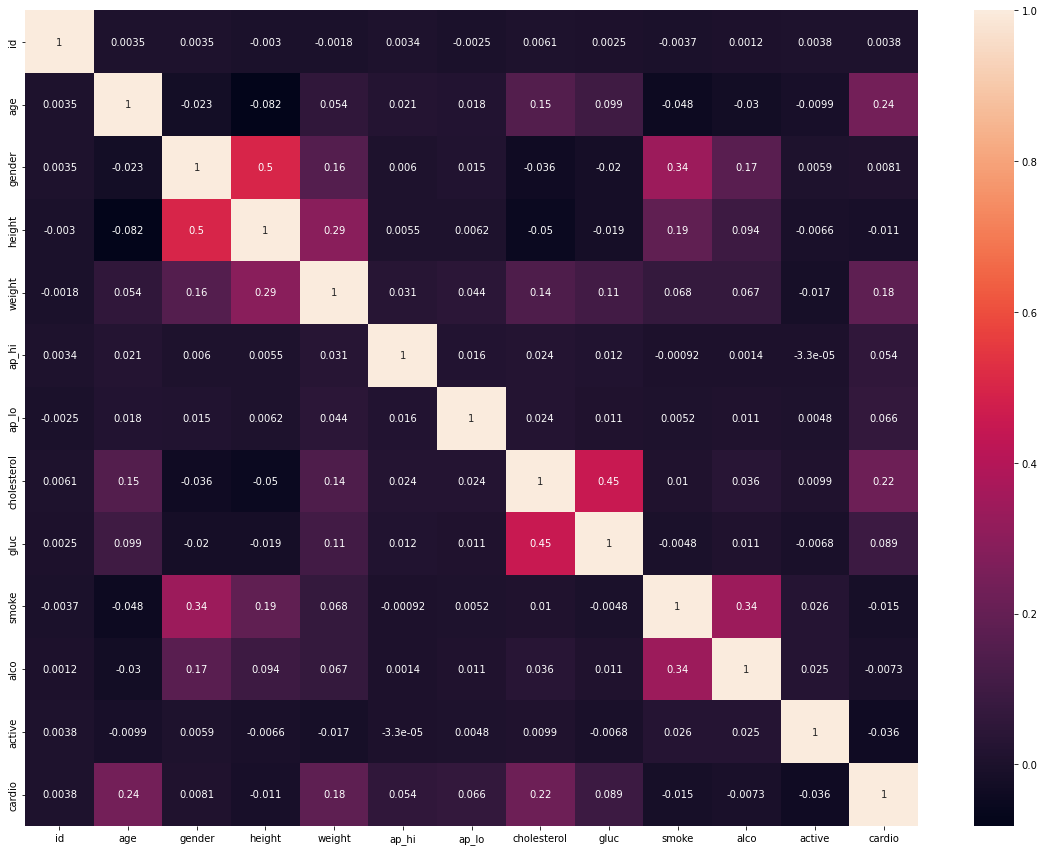

In [7]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (cardio) and that generally, there do not exist significant correlations between other variables. However, correlations exist between a select few variables:

- Height and gender are correlated with a score of 0.5.
- Glucose and cholesterol are correlated with a score of 0.45.
- Smoking habits and gender are correlated with a score of 0.34.
- Smoking habits and alcohol consumption are correlated with a score of 0.34. 

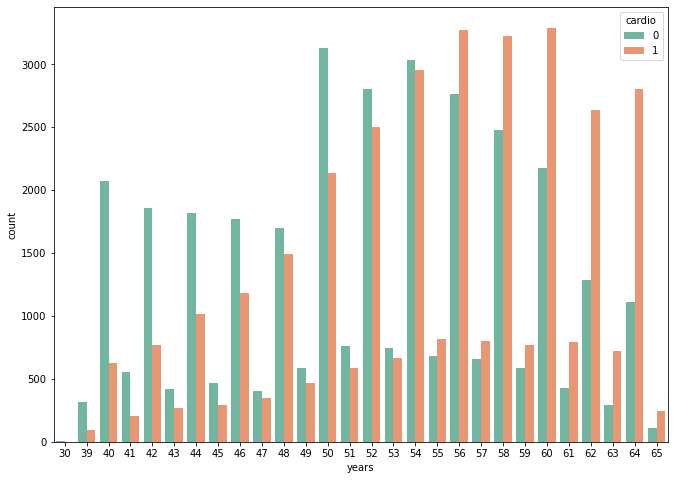

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

It can be observed that people over 55 of age are more exposed to CVD.

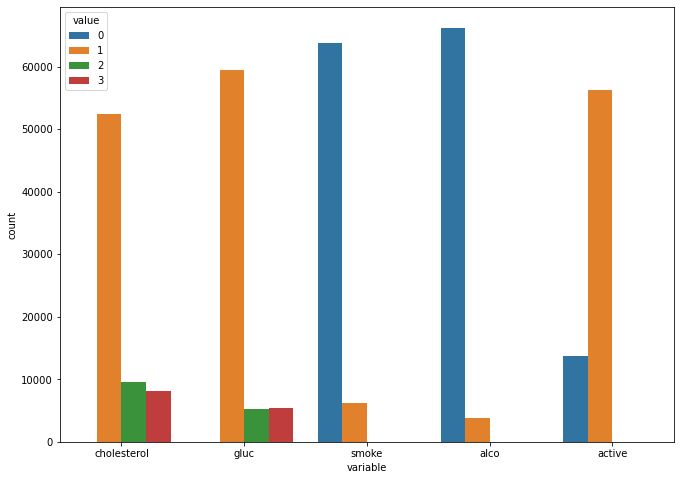

In [9]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

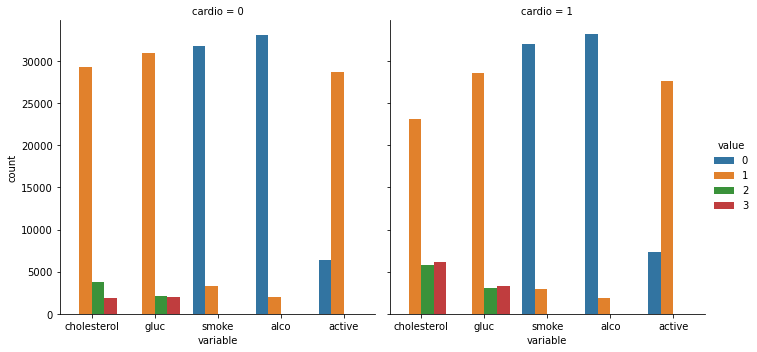

In [10]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

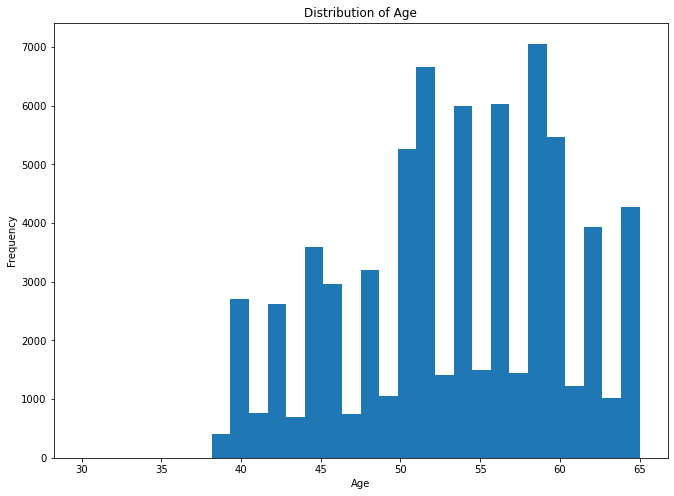

In [11]:
import matplotlib.pyplot as plt

# Histogram of age
plt.hist(df['years'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

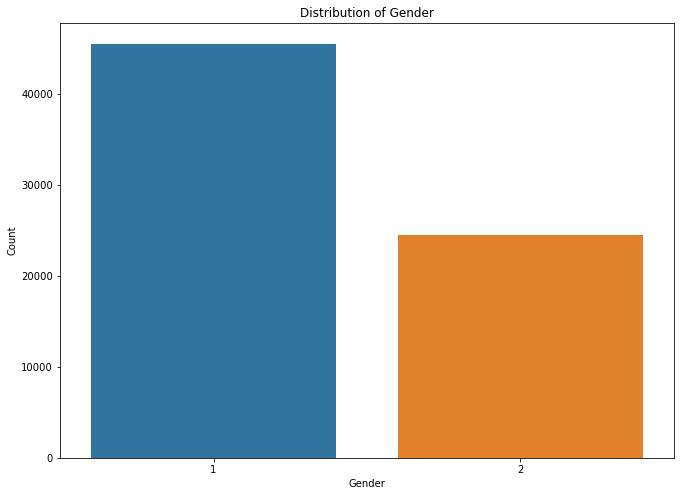

In [12]:
import seaborn as sns

# Bar chart of gender
sns.countplot(data=df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

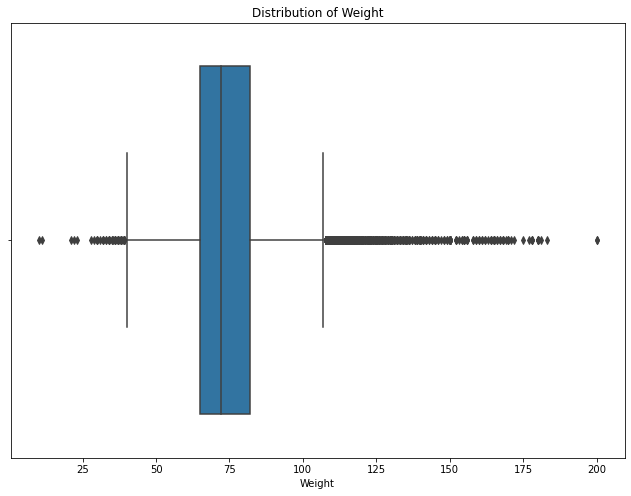

In [13]:
# Box plot of weight
sns.boxplot(data=df, x='weight')
plt.xlabel('Weight')
plt.title('Distribution of Weight')
plt.show()

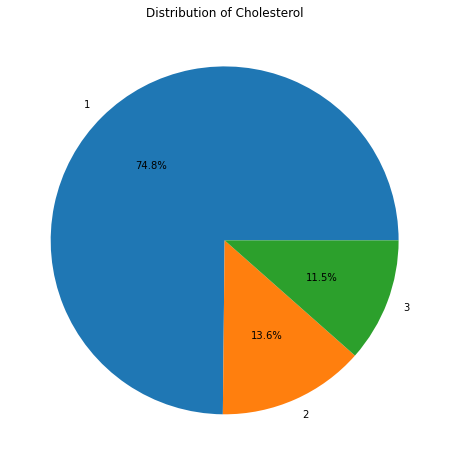

In [14]:
# Pie chart of cholesterol
df['cholesterol'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cholesterol')
plt.ylabel('')
plt.show()

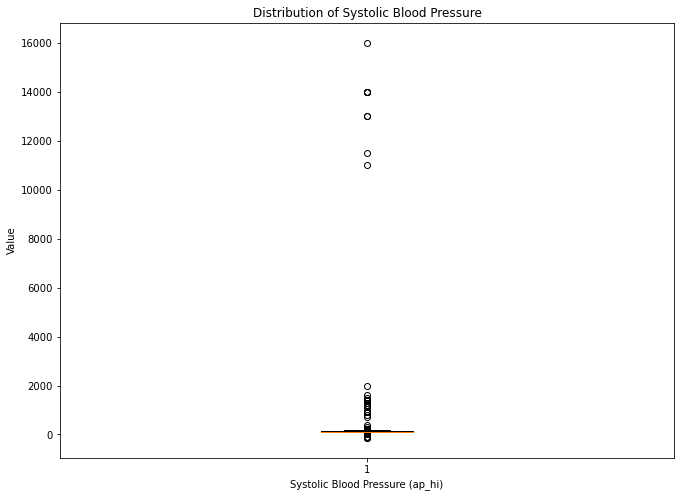

In [15]:
plt.boxplot(df['ap_hi'])
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Value')
plt.title('Distribution of Systolic Blood Pressure')
plt.show()

#Bivariate Analysis

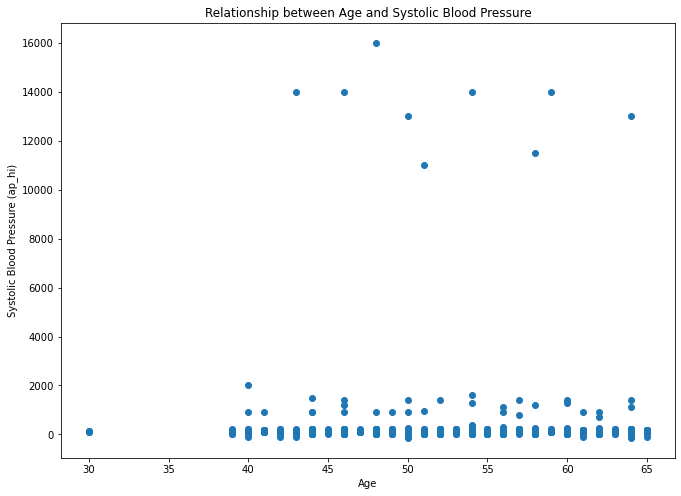

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df['years'], df['ap_hi'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.title('Relationship between Age and Systolic Blood Pressure')
plt.show()

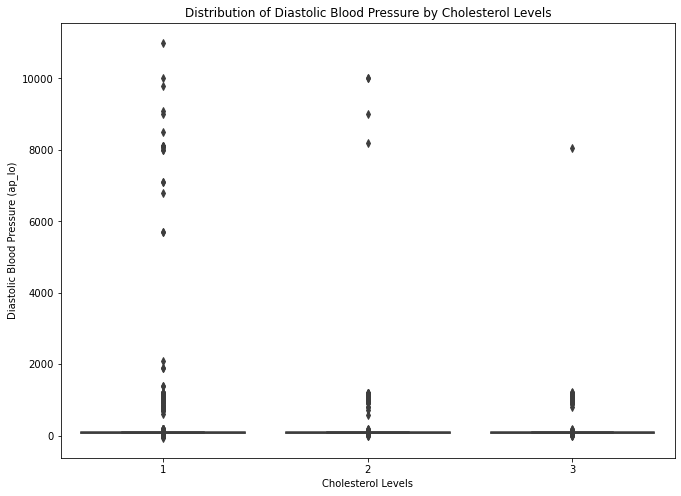

In [17]:
import seaborn as sns

sns.boxplot(x='cholesterol', y='ap_lo', data=df)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.title('Distribution of Diastolic Blood Pressure by Cholesterol Levels')
plt.show()

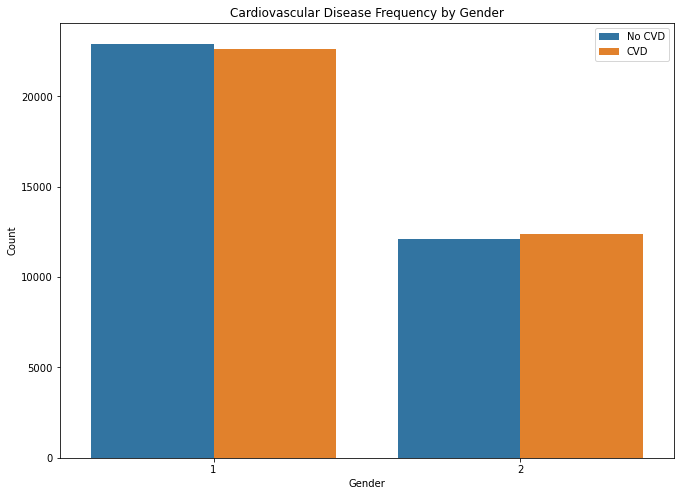

In [18]:
import seaborn as sns

sns.countplot(x='gender', hue='cardio', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Cardiovascular Disease Frequency by Gender')
plt.legend(['No CVD', 'CVD'])
plt.show()

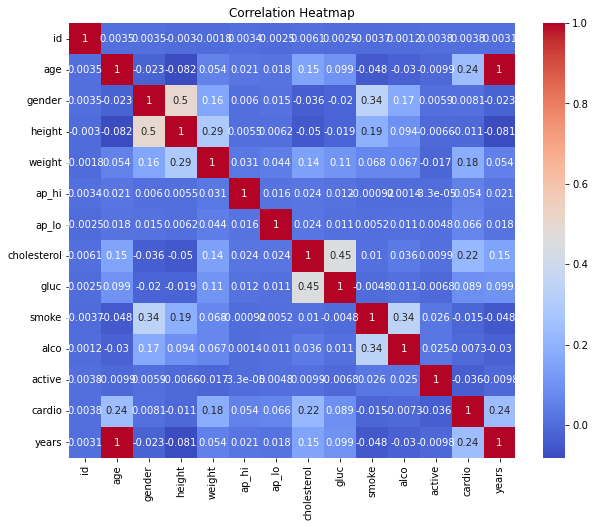

In [19]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Multivariate Analysis

In [20]:
import statsmodels.api as sm

# Define the independent variables
X = df[['years', 'ap_hi', 'ap_lo', 'cholesterol']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['cardio']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 cardio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1873.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:34:12   Log-Likelihood:                -47246.
No. Observations:               70000   AIC:                         9.450e+04
Df Residuals:                   69995   BIC:                         9.455e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5372      0.014    -37.279      

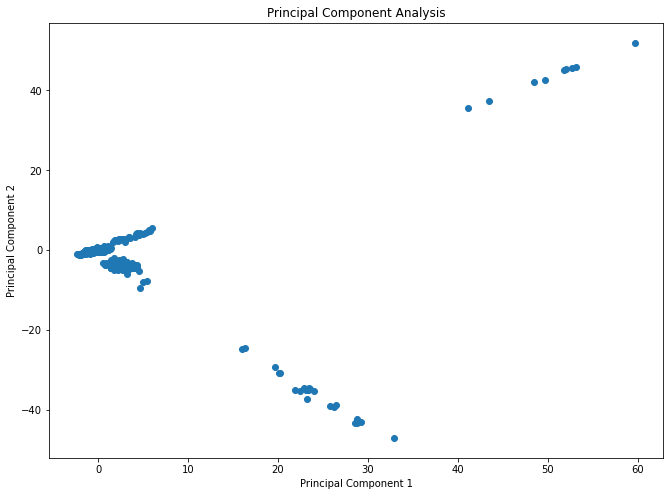

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age', 'ap_hi', 'ap_lo']])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a scatter plot of the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

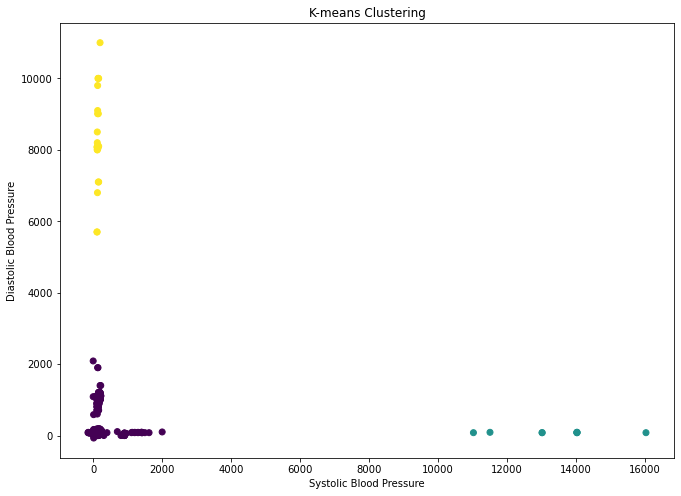

In [22]:
from sklearn.cluster import KMeans

# Select the variables for clustering
X = df[['years', 'ap_hi', 'ap_lo']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X['ap_hi'], X['ap_lo'], c=clusters)
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.title('K-means Clustering')
plt.show()

In [23]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. Let's see how many men and women presented in the dataset:

In [24]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Who more often report consuming alcohol - men or women?

In [25]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

So, men consume alcohol more frequently on average. Next, the target variables are balanced:

In [26]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

To see how the target class is distributed among men and women, we can use also crosstab

In [27]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


In [28]:
# cleaning data

# Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [29]:
l = df.columns.values
number_of_columns=int((len(l)-1)/2)
print(number_of_columns)

6


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

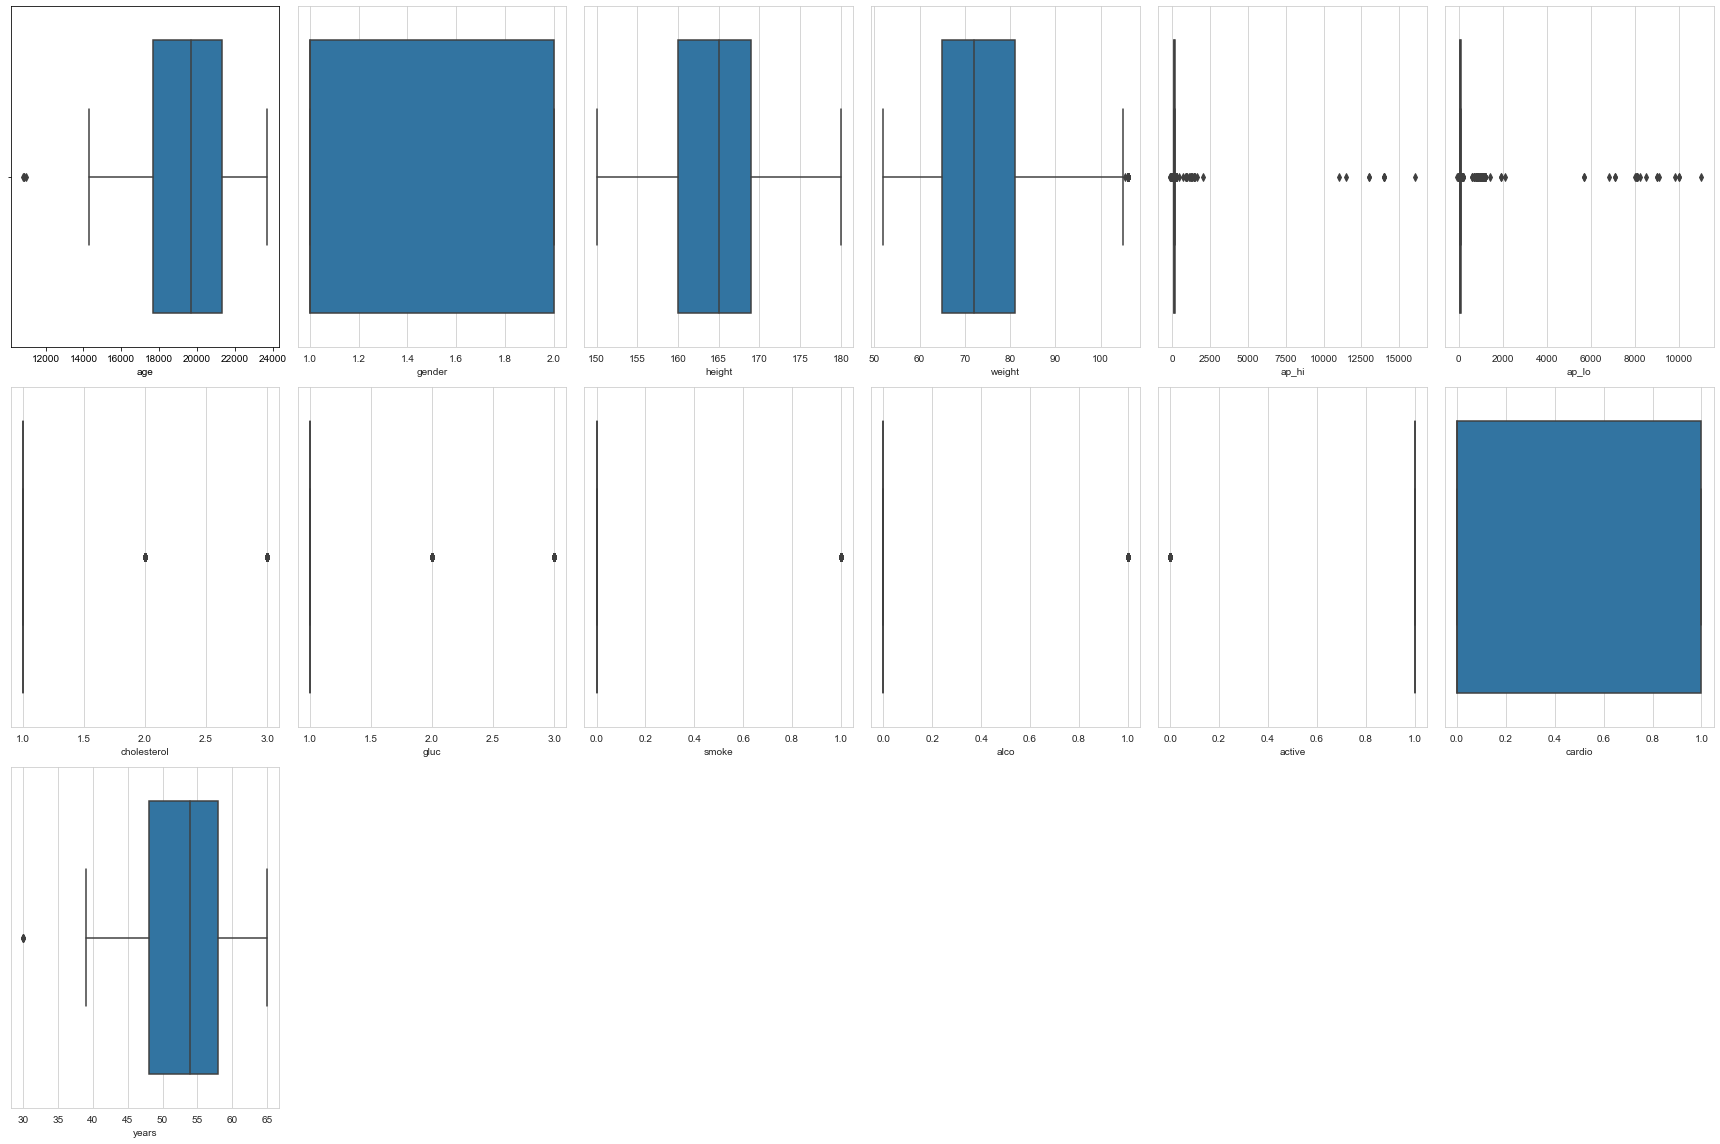

In [30]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=int((len(l)-1)/2)
    number_of_rows = 2
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables (ap_hi and ap_lo). These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

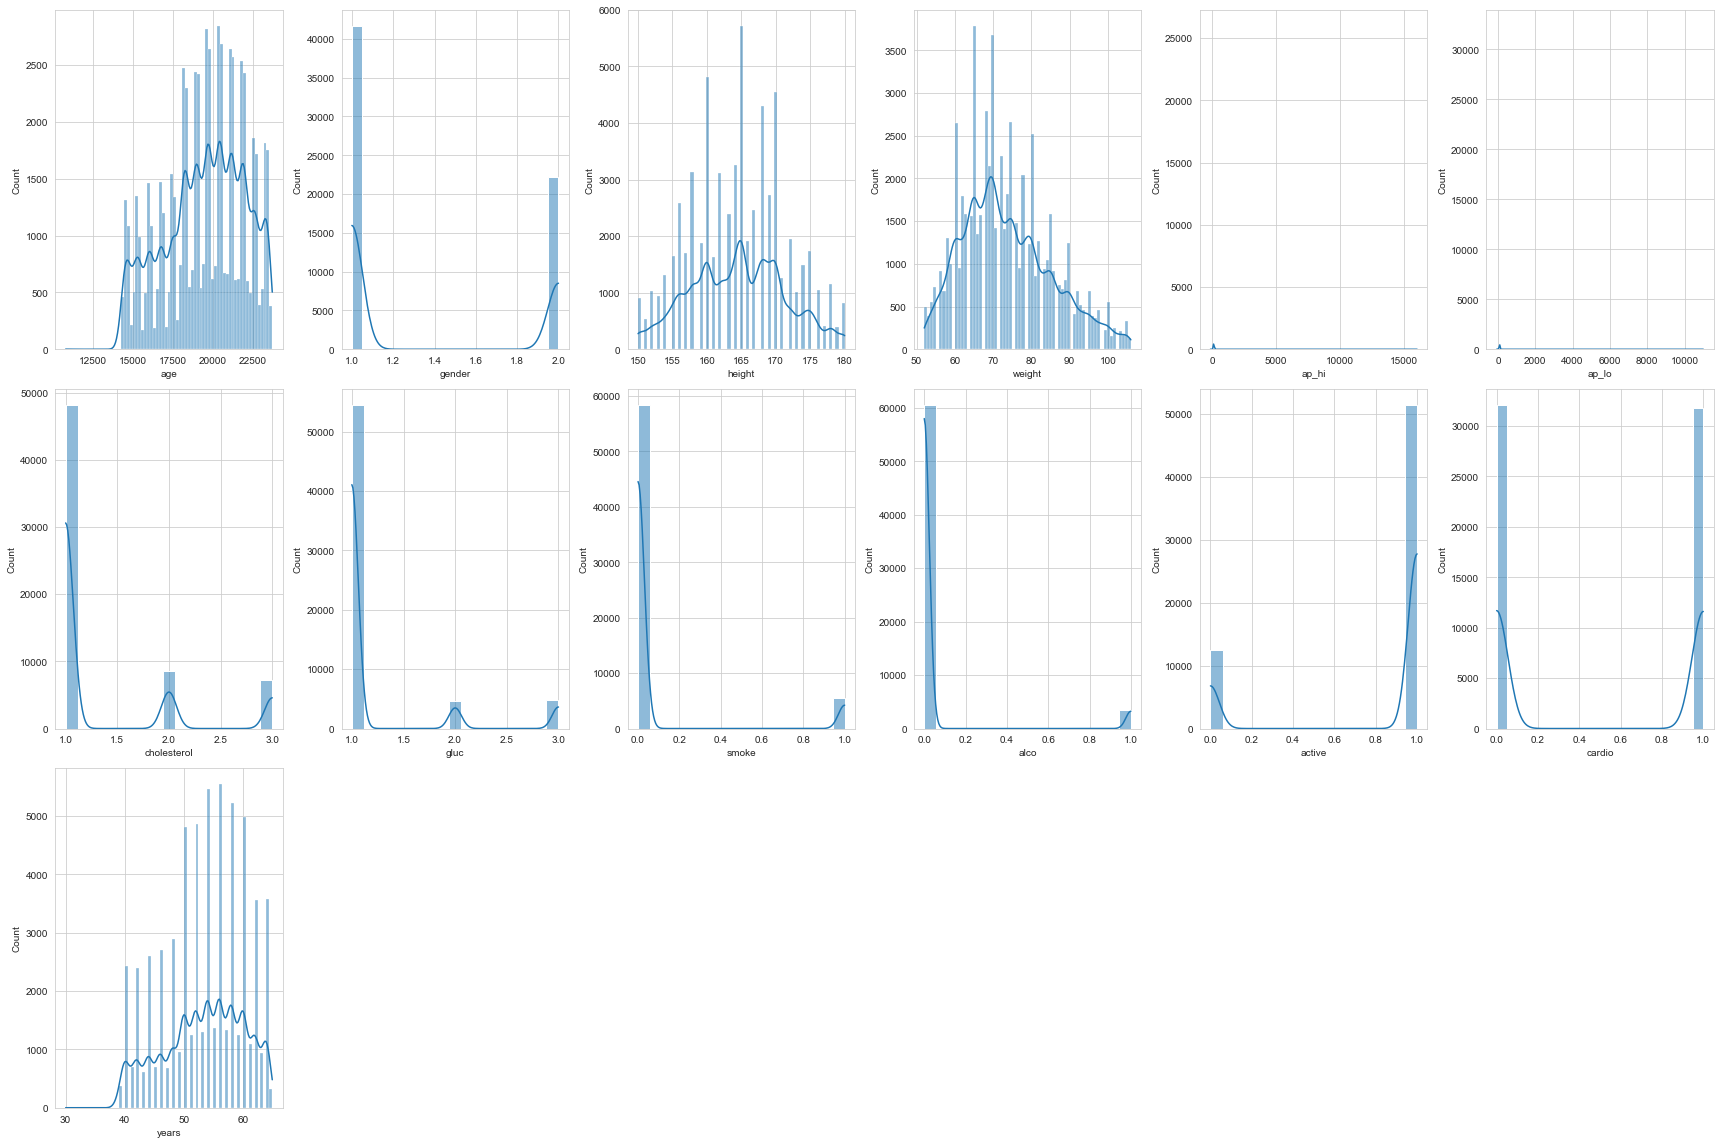

In [31]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=int((len(l)-1)/2)
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.histplot(df[l[i]],kde=True) 
        plt.tight_layout()
        
check_dist(df)

Histograms show the distribution of each feature in the dataset. There appears to be some variation in age, but height and weight are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as gender, cholesterol, glucose, smoking habits, alcohol use, and activity.

In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?

In [32]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Diastilic pressure is higher than systolic one in 1082 cases


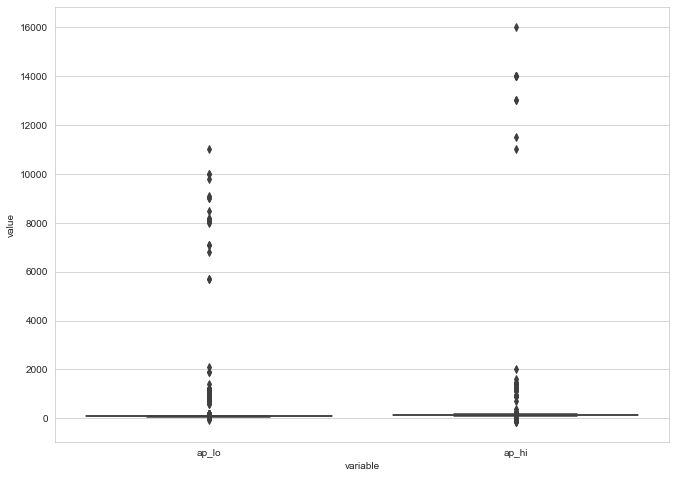

In [33]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [34]:
# remove outliers in ap_hi and ap_lo
cleaned_df = df[df['ap_hi'] < 250]  
cleaned_df = cleaned_df[cleaned_df['ap_lo'] < 250] 

print(cleaned_df.shape)

(63003, 14)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

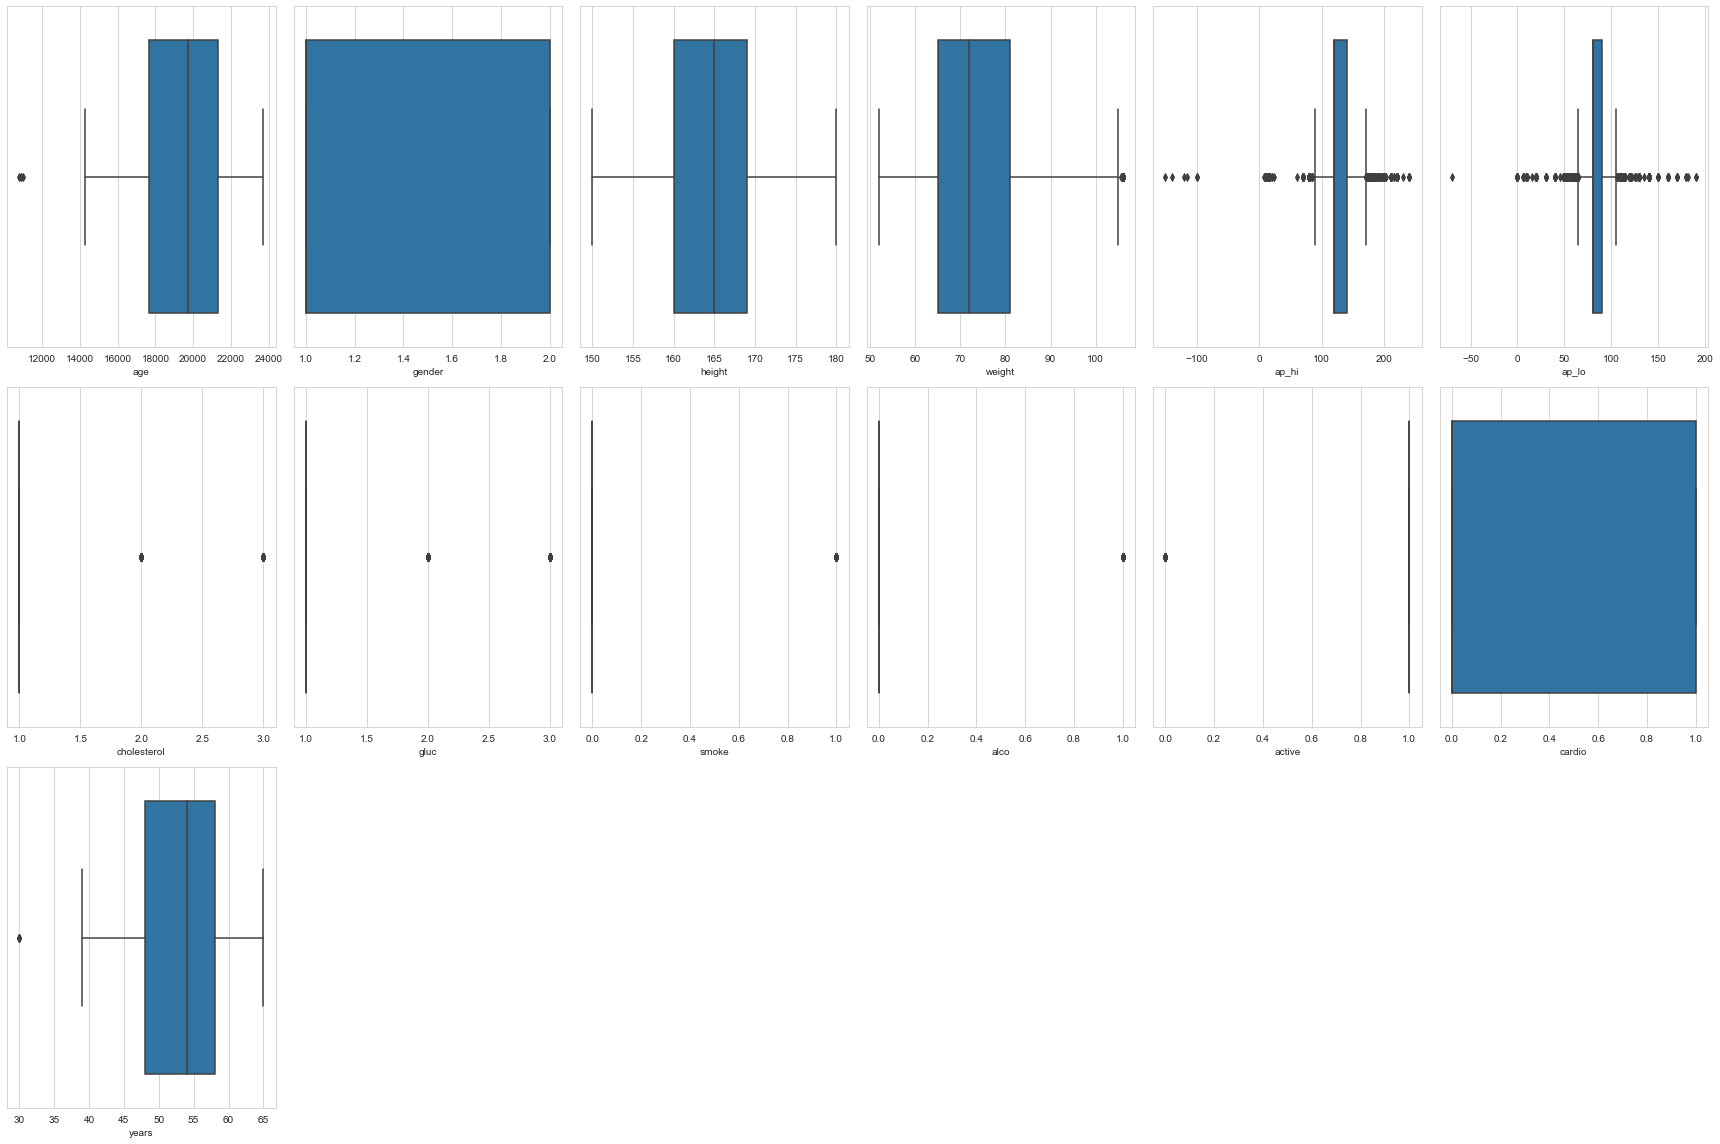

In [35]:
check_outliers(cleaned_df)

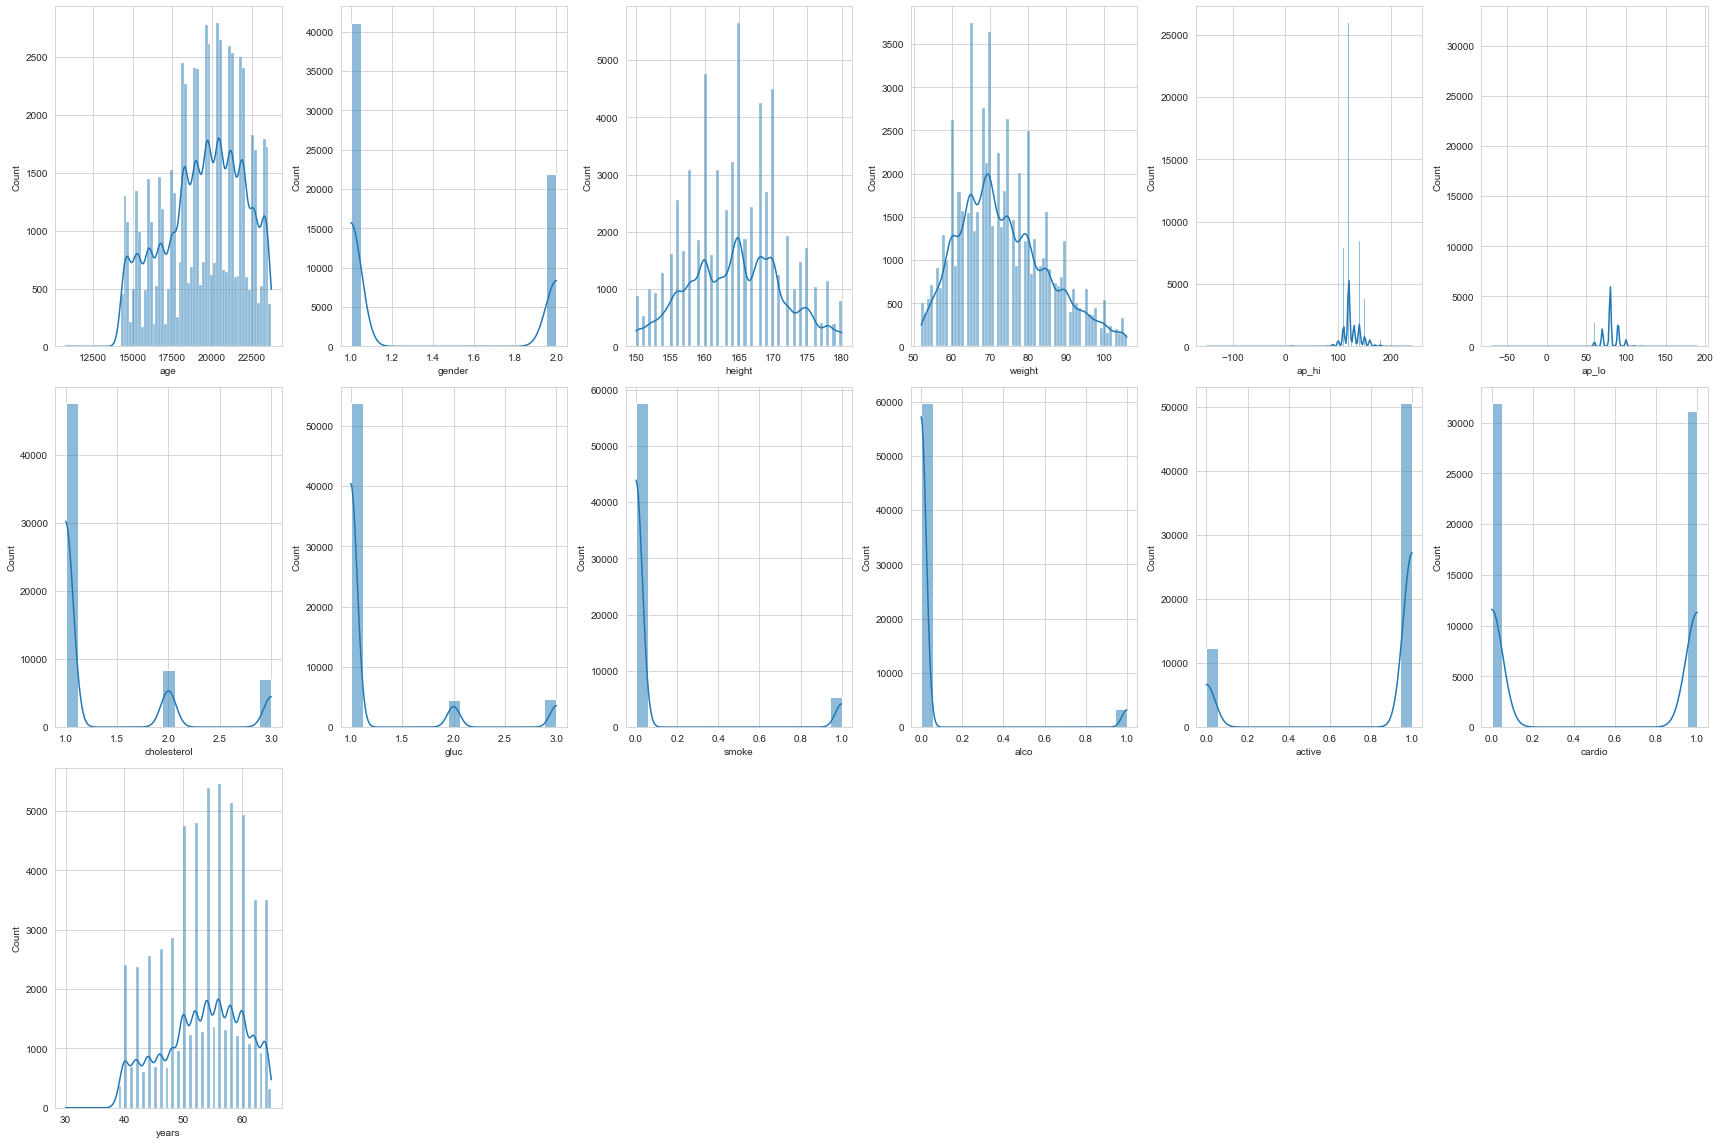

In [36]:
check_dist(cleaned_df)

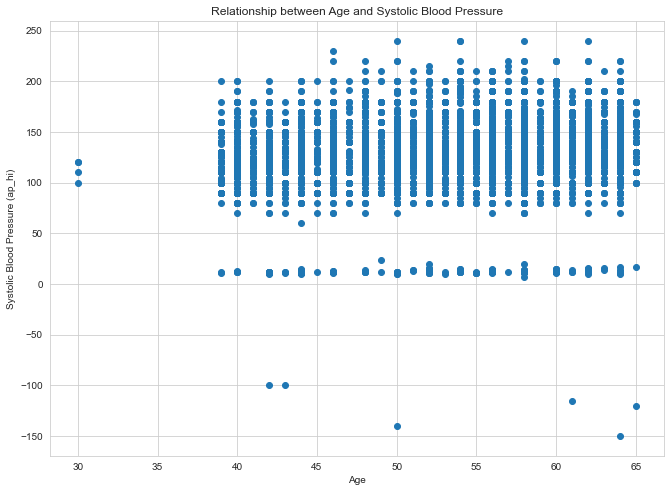

In [37]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df['years'], cleaned_df['ap_hi'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.title('Relationship between Age and Systolic Blood Pressure')
plt.show()

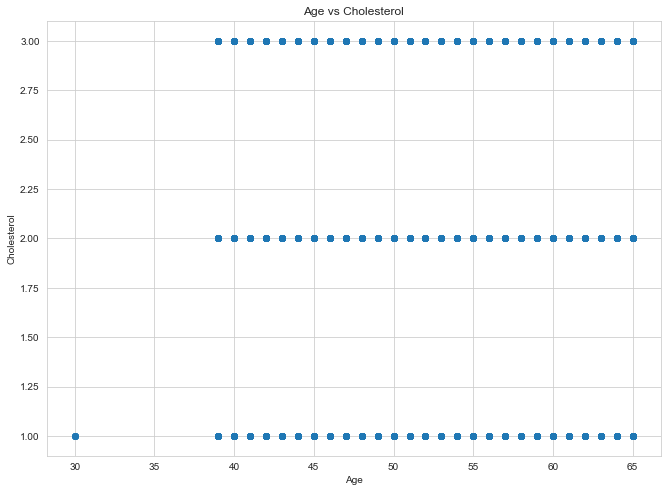

In [38]:
plt.scatter(cleaned_df['years'], cleaned_df['cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')
plt.show()

The dataset was preprocessed to remove outliers in the ap_hi and ap_lo blood pressure features. Only values less than 250 were kept in the data. Through this process, almost 1000 datapoints were discarded, but the resultant distributions depicted in the above bar plots and histograms for ap_hi and ap_lo are roughly normal.

Note that we are dealing with a mix of continuous, ordinal, and binary data, as confirmed from the above data analysis. We can combine all of these data types in one model. Here are a few typical steps we took to preprocess this data before modeling.

Standardize all continuous features: All continuous input should be standardized. For every continuous feature, compute its mean (𝜇) and standard deviation (𝜎) and calculate 𝑥 = (𝑥−𝜇) / 𝜎.
Binarize categorical/discrete features (create dummy variables): For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called cholesterol, have 3 boolean features - chol_normal, chol_above_normal, chol_well_above_normal and appropriately set these features to 0 or 1. As can be seen, for every categorical feature, k binary features are added, where k is the number of values that the categorical feature takes.

In [39]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
x = cleaned_df[features]
y = cleaned_df['cardio']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train.shape

(44102, 11)

In [41]:
logi_clf_cv = LogisticRegression()

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver':['newton-cg'],'random_state':[42]}
gridsearchmodel = GridSearchCV(logi_clf_cv, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Precision: ", precision_score(y_pred,y_test))
print("Recall: ", recall_score(y_pred,y_test))
print("F1 score: ", f1_score(y_pred,y_test))
print("Specificity: ", recall_score(y_pred,y_test, pos_label = 0))
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

gridsearchmodel.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

Accuracy:  0.7158880482514153
Precision:  0.6607986260197509
Recall:  0.7358355247430074
F1 score:  0.6963013233797081
Specificity:  0.7000474608448031
Confusion Matrix:
[[7375 2210]
 [3160 6156]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


{'random_state': 42, 'solver': 'newton-cg'}

In [43]:
parameters = {'solver':['liblinear'],'random_state':[42]}
gridsearchmodel = GridSearchCV(logi_clf_cv, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Precision: ", precision_score(y_pred,y_test))
print("Recall: ", recall_score(y_pred,y_test))
print("F1 score: ", f1_score(y_pred,y_test))
print("Specificity: ", recall_score(y_pred,y_test, pos_label = 0))
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

gridsearchmodel.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Accuracy:  0.7023966985873763
Precision:  0.6616573636753972
Recall:  0.7136737293041565
F1 score:  0.6866818916058598
Specificity:  0.6929072486360094
Confusion Matrix:
[[7112 2473]
 [3152 6164]]


{'random_state': 42, 'solver': 'liblinear'}

In [44]:
parameters = {'solver':['newton-cg', 'liblinear'],'random_state':[42]}
gridsearchmodel = GridSearchCV(logi_clf_cv, parameters,cv=3,verbose=2, n_jobs=-1)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Precision: ", precision_score(y_pred,y_test))
print("Recall: ", recall_score(y_pred,y_test))
print("F1 score: ", f1_score(y_pred,y_test))
print("Specificity: ", recall_score(y_pred,y_test, pos_label = 0))
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

gridsearchmodel.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

Accuracy:  0.7158880482514153
Precision:  0.6607986260197509
Recall:  0.7358355247430074
F1 score:  0.6963013233797081
Specificity:  0.7000474608448031
Confusion Matrix:
[[7375 2210]
 [3160 6156]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


{'random_state': 42, 'solver': 'newton-cg'}

In [45]:
y_pred_prob = gridsearchmodel.predict_proba(x_test)[:, 1]

<Figure size 792x576 with 0 Axes>

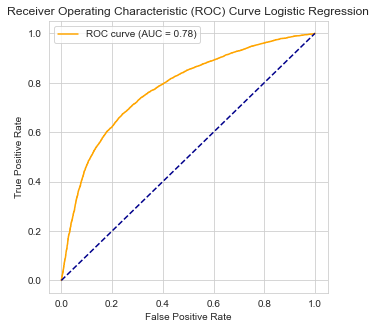

In [46]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Logistic Regression')
plt.legend(loc=0)
plt.savefig('LogisticRegression ROC', dpi=150)

In [47]:
confusion_matrix(y_test, y_pred)

array([[7375, 2210],
       [3160, 6156]], dtype=int64)

In [48]:
deci_clf_cv = DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
gridsearchmodel = GridSearchCV(deci_clf_cv, parameters, cv=5)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Precision: ", precision_score(y_pred,y_test))
print("Recall: ", recall_score(y_pred,y_test))
print("F1 score: ", f1_score(y_pred,y_test))
print("Specificity: ", recall_score(y_pred,y_test, pos_label = 0))
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
gridsearchmodel.best_params_

Accuracy:  0.7220252896672134
Precision:  0.6577930442249893
Recall:  0.7478642909445936
F1 score:  0.6999428897772701
Specificity:  0.7022508639207995
Confusion Matrix:
[[7519 2066]
 [3188 6128]]


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [50]:
y_pred_prob = gridsearchmodel.predict_proba(x_test)[:, 1]

<Figure size 792x576 with 0 Axes>

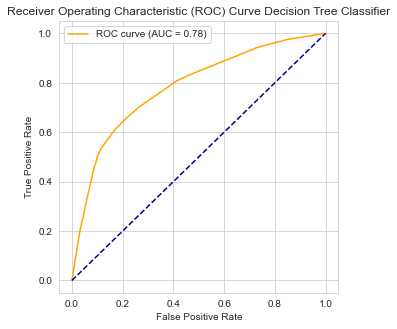

In [51]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Decision Tree Classifier')
plt.legend(loc=0)
plt.savefig('Decision Tree Classifier ROC', dpi=150)

In [52]:
knn_clf_cv = KNeighborsClassifier(n_neighbors=265)

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]}
gridsearchmodel = GridSearchCV(knn_clf_cv, parameters,cv=5)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Precision: ", precision_score(y_pred,y_test))
print("Recall: ", recall_score(y_pred,y_test))
print("F1 score: ", f1_score(y_pred,y_test))
print("Specificity: ", recall_score(y_pred,y_test, pos_label = 0))
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
gridsearchmodel.best_params_

Accuracy:  0.6796994867996402
Precision:  0.6434091884929154
Recall:  0.6869126747650699
F1 score:  0.664449617559029
Specificity:  0.6735135135135135
Confusion Matrix:
[[6853 2732]
 [3322 5994]]


{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [54]:
y_pred_prob = gridsearchmodel.predict_proba(x_test)[:, 1]

<Figure size 792x576 with 0 Axes>

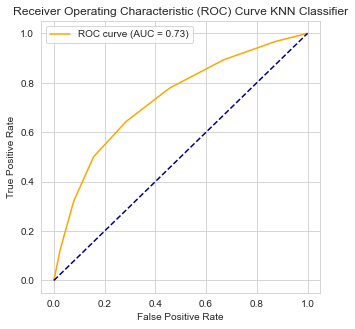

In [55]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve KNN Classifier')
plt.legend(loc=0)
plt.savefig('KNNClassifier ROC', dpi=150)

In [56]:
rf_clf_cv = RandomForestClassifier(n_estimators=100)

In [57]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators': np.arange(100, 1000, 100),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)}
gridsearchmodel = RandomizedSearchCV(rf_clf_cv, parameters,cv=5,n_iter=20)
gridsearchmodel.fit(x_train, y_train)
y_pred = gridsearchmodel.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Precision: ", precision_score(y_pred,y_test))
print("Recall: ", recall_score(y_pred,y_test))
print("F1 score: ", f1_score(y_pred,y_test))
print("Specificity: ", recall_score(y_pred,y_test, pos_label = 0))
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
gridsearchmodel.best_params_

Accuracy:  0.7246177450928523
Precision:  0.6635895234006011
Recall:  0.74906094753423
F1 score:  0.7037395412374068
Specificity:  0.7056724267468069
Confusion Matrix:
[[7514 2071]
 [3134 6182]]


{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'criterion': 'entropy'}

In [58]:
y_pred_prob = gridsearchmodel.predict_proba(x_test)[:, 1]

<Figure size 792x576 with 0 Axes>

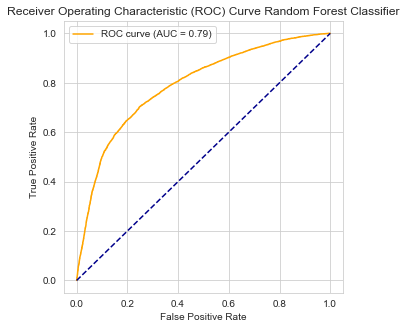

In [59]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Random Forest Classifier')
plt.legend(loc=0)
plt.savefig('RandomForest ROC', dpi=150)

In [60]:
cont_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ord_cols = ['cholesterol', 'gluc']
bin_cols = ['gender', 'smoke', 'alco', 'active', 'cardio']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(cleaned_df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
df_normalized.head()

,age,height,weight,ap_hi,ap_lo
0,0.588076,0.600000,0.185185,0.666667,0.576923
1,0.730159,0.200000,0.611111,0.743590,0.615385
2,0.624003,0.500000,0.222222,0.717949,0.538462
3,0.528455,0.633333,0.555556,0.769231,0.653846
4,0.516918,0.200000,0.074074,0.641026,0.500000


In [61]:
for col in ord_cols:
    dummies = pd.get_dummies(cleaned_df[col])
    min_ind = min([ind for ind in dummies.columns])
    dummies.columns = ['{0}_{1}'.format(col, ind) for ind in dummies.columns]
    df_normalized = pd.concat([df_normalized, dummies.drop(['{0}_{1}'.format(col, min_ind)], axis=1)], axis=1)

    
df_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0.588076,0.600000,0.185185,0.666667,0.576923,0.0,0.0,0.0,0.0
1,0.730159,0.200000,0.611111,0.743590,0.615385,0.0,1.0,0.0,0.0
2,0.624003,0.500000,0.222222,0.717949,0.538462,0.0,1.0,0.0,0.0
3,0.528455,0.633333,0.555556,0.769231,0.653846,0.0,0.0,0.0,0.0
4,0.516918,0.200000,0.074074,0.641026,0.500000,0.0,0.0,0.0,0.0


In [62]:
df_normalized = pd.concat([df_normalized, cleaned_df[bin_cols]], axis=1)
df_normalized['gender'] -= 1  # shift the categorical labels for gender to be either 0 or 1

df_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.588076,0.600000,0.185185,0.666667,0.576923,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.730159,0.200000,0.611111,0.743590,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.500000,0.222222,0.717949,0.538462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,0.633333,0.555556,0.769231,0.653846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.516918,0.200000,0.074074,0.641026,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_normalized.isnull().values.any()

True

In [64]:
df_normalized.dropna(axis = 'index' , how = 'any' , inplace = True)

In [65]:
# save this cleaned data
df_normalized.to_csv(r'C:\Users\lenovo\OneDrive\Documents\Research\Heart\Dataset\cardio_cleaned.csv', index=False)

In [66]:
#separating into train and test data
df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X = df_normalized.drop('cardio', axis=1)
y = df_normalized['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # 70% training and 30% test

(56742, 14)


In [67]:
# try Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model training 
logi_clf = LogisticRegression()
logi_clf.fit(X_train, y_train)

LogisticRegression()

In [68]:
# try decesion tree

# Model Training
dece_clf = DecisionTreeClassifier()
dece_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
# try Random Forest Classifier
# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
# try KNN 
knn_clf = KNeighborsClassifier(n_neighbors=265)  # k is the number of neighbors to consider
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=265)

In [71]:
# try naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [72]:
# evaluate the model
def evaluate_model(clf, X_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    # F1 Score: what percentage of positive tuples are labelled as such?
    print("F1 Score:",metrics.f1_score(y_test, y_pred))
    
    # Specificity: what percentage of positive tuples are labelled as such?
    print("Specificity:",metrics.recall_score(y_test, y_pred, pos_label=0))
    
    #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

In [73]:
# evaluate logistic regression
evaluate_model(logi_clf, X_test, y_test)

# get feature importances
# feature_imp = pd.Series(logi_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
# feature_imp

Accuracy: 0.5893790753686189
Precision: 0.6482743460101121
Recall: 0.3536395251229164
F1 Score: 0.457635009310987
Specificity: 0.8157531091662829
Confusion Matrix:
[[7084 1600]
 [5390 2949]]


In [74]:
# evaluate decesion tree model
evaluate_model(dece_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(dece_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.5291076778476179
Precision: 0.5193158713072599
Recall: 0.5206859335651757
F1 Score: 0.52
Specificity: 0.5371948410870566
Confusion Matrix:
[[4665 4019]
 [3997 4342]]


age              0.363537
weight           0.204758
height           0.187916
ap_hi            0.074631
ap_lo            0.063685
cholesterol_3    0.035604
gender           0.020357
cholesterol_2    0.012396
alco             0.009817
gluc_3           0.008656
gluc_2           0.008397
smoke            0.005820
active           0.004426
dtype: float64

In [75]:
# evaluate random forest classifier
evaluate_model(rf_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.5504905128355754
Precision: 0.544755700325733
Recall: 0.5013790622376784
F1 Score: 0.5221681029099537
Specificity: 0.5976508521418701
Confusion Matrix:
[[5190 3494]
 [4158 4181]]


age              0.364529
weight           0.217162
height           0.176998
ap_hi            0.087836
ap_lo            0.062704
cholesterol_3    0.037537
gender           0.012251
cholesterol_2    0.011237
gluc_3           0.006869
active           0.006474
alco             0.005682
smoke            0.005649
gluc_2           0.005072
dtype: float64

In [76]:
# evaluate KNN classifier
evaluate_model(knn_clf, X_test, y_test)

# get feature importances
# feature_imp = pd.Series(knn_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
# feature_imp

Accuracy: 0.5913176290900546
Precision: 0.632375478927203
Recall: 0.3958508214414198
F1 Score: 0.486909064090272
Specificity: 0.7790188853063105
Confusion Matrix:
[[6765 1919]
 [5038 3301]]


In [79]:
# evaluate Naive Bayes
evaluate_model(nb_clf, X_test, y_test)

# get feature importances
# feature_imp = pd.Series(nb_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
# feature_imp

Accuracy: 0.5880867062209951
Precision: 0.6384310452743585
Recall: 0.366950473677899
F1 Score: 0.46603716113310995
Specificity: 0.80043758636573
Confusion Matrix:
[[6951 1733]
 [5279 3060]]


In [82]:
y_pred_prob = nb_clf.predict_proba(X_test)[:, 1]

<Figure size 792x576 with 0 Axes>

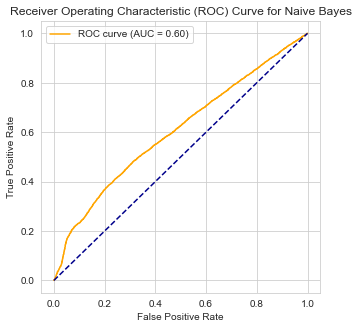

In [83]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc=0)
plt.savefig('NaiveBayes ROC', dpi=150)

The RF classifier yielded an accuracy of 0.55 and a recall rate of 0.51. There is room for improvement over the baseline predictive models. Future direction may include tuning hyperparameters for the RF classifiers, or using other types of models, such as linear and logistic regression, Bayesian classifiers, and feed-forward neural networks.